### import

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from pycocotools.coco import COCO
import matplotlib.pyplot as plt

### jsontoframe

In [1]:
def jsontoframe(datapath):
    coco = COCO(datapath)

    train_df = pd.DataFrame()

    image_ids = []
    class_name = []
    class_id = []
    x_min = []
    y_min = []
    x_max = []
    y_max = []
    classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
            "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
    for image_id in coco.getImgIds():
            
        image_info = coco.loadImgs(image_id)[0]
        ann_ids = coco.getAnnIds(imgIds=image_info['id'])
        anns = coco.loadAnns(ann_ids)
            
        file_name = image_info['file_name']
            
        for ann in anns:
            image_ids.append(file_name)
            class_name.append(classes[ann['category_id']])
            class_id.append(ann['category_id'])
            x_min.append(float(ann['bbox'][0]))
            y_min.append(float(ann['bbox'][1]))
            x_max.append(float(ann['bbox'][0]) + float(ann['bbox'][2]))
            y_max.append(float(ann['bbox'][1]) + float(ann['bbox'][3]))

    train_df['image_id'] = image_ids
    train_df['class_name'] = class_name
    train_df['class_id'] = class_id
    train_df['x_min'] = x_min
    train_df['y_min'] = y_min
    train_df['x_max'] = x_max
    train_df['y_max'] = y_max
    
    return train_df

### data init

In [95]:
TRAIN_PATH = './dataset/train.json'
with open(TRAIN_PATH) as f: data = json.load(f)

df = jsontoframe(TRAIN_PATH)

LABELS = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
            "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [8]:
df

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
0,train/0000.jpg,General trash,0,197.6,193.7,745.4,663.4
1,train/0001.jpg,Metal,3,0.0,407.4,57.6,588.0
2,train/0001.jpg,Plastic bag,7,0.0,455.6,144.6,637.2
3,train/0001.jpg,Glass,4,722.3,313.4,996.6,565.3
4,train/0001.jpg,Plastic,5,353.2,671.0,586.9,774.4
...,...,...,...,...,...,...,...
23139,train/4882.jpg,Plastic,5,0.0,116.2,944.1,930.3
23140,train/4882.jpg,Plastic bag,7,302.1,439.3,567.3,655.4
23141,train/4882.jpg,General trash,0,511.3,451.1,570.0,481.3
23142,train/4882.jpg,Paper,1,255.0,421.4,526.7,616.5


In [110]:
bbox_df = pd.DataFrame()

for i in range(10):
    temp_df = df[df['class_id'] == i]
    temp = temp_df.apply(lambda x:(x[5]-x[3]) / (x[6]-x[4]), axis=1).sort_values().reset_index(drop=True)
    bbox_df[i] = temp

### label 별 bbox 비율
- 이미지당 label 겹치는 정도

In [111]:
bbox_df

,0,1,2,3,4,5,6,7,8,9
0,0.055391,0.059980,0.175130,0.059490,0.139828,0.092650,0.129452,0.074430,0.216048,0.113007
1,0.061125,0.076017,0.196433,0.111720,0.141411,0.092744,0.134283,0.098238,0.217679,0.163173
2,0.063107,0.103552,0.241342,0.112442,0.143045,0.115317,0.138118,0.099081,0.220500,0.175521
3,0.069424,0.104663,0.271978,0.120386,0.172329,0.127187,0.141311,0.099919,0.229175,0.194758
4,0.071000,0.104954,0.282128,0.143423,0.176020,0.128043,0.164194,0.105197,0.235027,0.202104
...,...,...,...,...,...,...,...,...,...,...
3961,17.130621,1.336330,NaN,NaN,NaN,NaN,NaN,1.349160,NaN,NaN
3962,17.733333,1.336980,NaN,NaN,NaN,NaN,NaN,1.349341,NaN,NaN
3963,18.949367,1.337485,NaN,NaN,NaN,NaN,NaN,1.349368,NaN,NaN
3964,27.261111,1.337533,NaN,NaN,NaN,NaN,NaN,1.349558,NaN,NaN


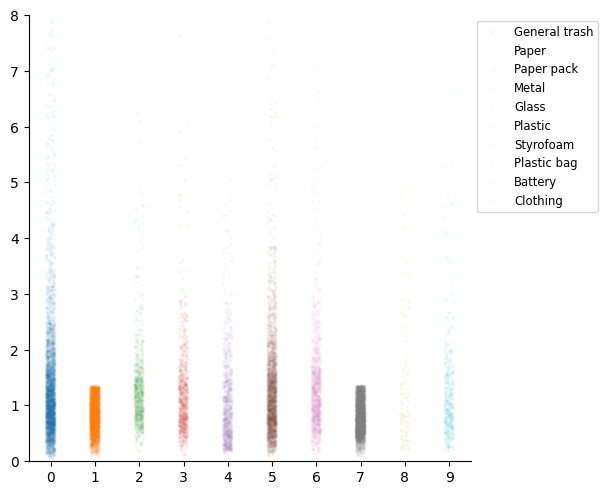

In [112]:
sns.catplot(bbox_df, alpha = 0.05, s=5)
plt.ylim(0,8)
plt.legend(labels=LABELS, fontsize='small', loc = 2, bbox_to_anchor = (1,1))

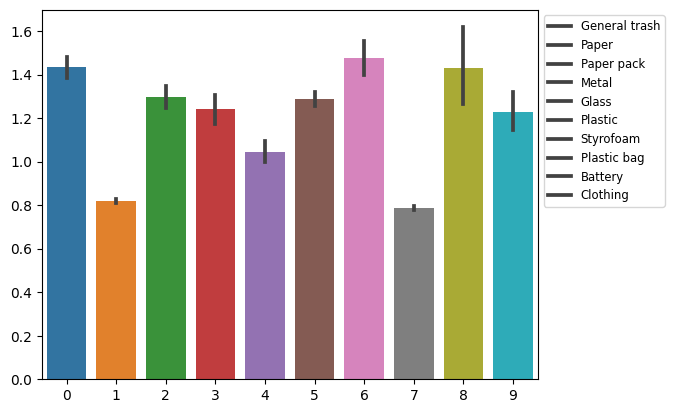

In [120]:
sns.barplot(bbox_df)
plt.legend(labels=LABELS, fontsize='small', loc = 2, bbox_to_anchor = (1,1))

<AxesSubplot:>

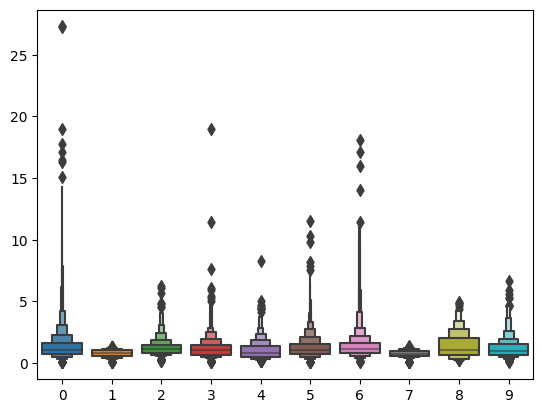

In [117]:
sns.boxenplot(bbox_df)

<AxesSubplot:>

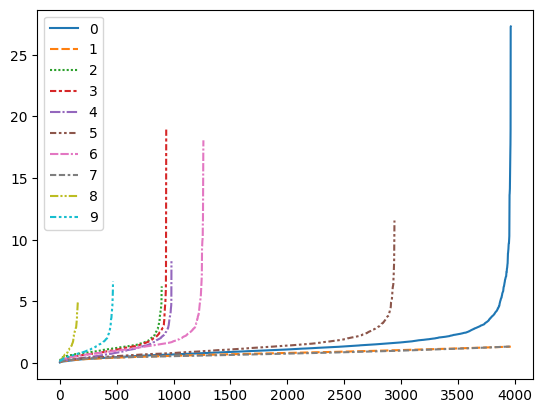

In [70]:
sns.lineplot(bbox_df)

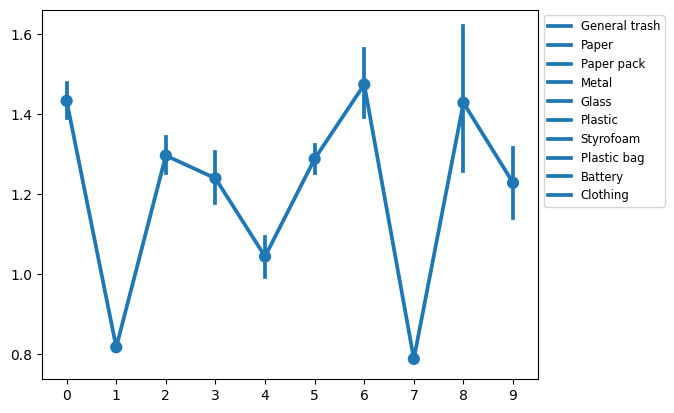

In [118]:
sns.pointplot(bbox_df)
plt.legend(labels=LABELS, fontsize='small', loc = 2, bbox_to_anchor = (1,1))

### label 별 rgb 분포
